<a href="https://colab.research.google.com/github/prrai1712/Gramener/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle



In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kittu17","key":"1f38305a6144c87307f4937087ef8885"}'}

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"



In [4]:
!kaggle datasets download -d mustafaali96/weight-height


Dataset URL: https://www.kaggle.com/datasets/mustafaali96/weight-height
License(s): unknown
  0% 0.00/167k [00:00<?, ?B/s]
100% 167k/167k [00:00<00:00, 69.4MB/s]


In [5]:
!unzip weight-height.zip



Archive:  weight-height.zip
  inflating: weight-height.csv       


In [6]:
import pandas as pd
df = pd.read_csv('weight-height.csv')
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
import pandas as pd

def handle_missing_values(df):
    num_cols = df.select_dtypes(include=['number']).columns

    df_mean = df.copy()
    df_median = df.copy()
    df_mode = df.copy()

    df_mean[num_cols] = df_mean[num_cols].fillna(df_mean[num_cols].mean())
    df_median[num_cols] = df_median[num_cols].fillna(df_median[num_cols].median())
    df_mode[num_cols] = df_mode[num_cols].fillna(df_mode[num_cols].mode().iloc[0])

    return df_mean, df_median, df_mode

df_mean, df_median, df_mode = handle_missing_values(df)

df_mean.to_csv('weight-height_with_mean.csv', index=False)
df_median.to_csv('weight-height_with_median.csv', index=False)
df_mode.to_csv('weight-height_with_mode.csv', index=False)

from google.colab import files
files.download('weight-height_with_mean.csv')
files.download('weight-height_with_median.csv')
files.download('weight-height_with_mode.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **LAB 2**

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('weight-height.csv')
num_cols = df.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[num_cols] = scaler.fit_transform(df_min_max[num_cols])

scaler = StandardScaler()
df_o1 = df.copy()
df_o1[num_cols] = scaler.fit_transform(df_o1[num_cols])

df_min_max.to_csv('weight-height_min_max.csv', index=False)
df_o1.to_csv('weight-height_o1.csv', index=False)

from google.colab import files
files.download('weight-height_min_max.csv')
files.download('weight-height_o1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **LAB 3**

In [10]:
import numpy as np
from scipy.stats import entropy

def ent(p):
    return entropy(p, base=2)

def joint_ent(p_x, p_y):
    p_xy = np.outer(p_x, p_y).flatten()
    return entropy(p_xy, base=2)

def cond_ent(p_x, p_y):
    return joint_ent(p_x, p_y) - ent(p_y)

def info_gain(p_x, p_y):
    return ent(p_x) - cond_ent(p_x, p_y)

def mutual_info(p_x, p_y):
    return ent(p_x) + ent(p_y) - joint_ent(p_x, p_y)

def gini(p):
    return 1 - np.sum(p ** 2)

p_x = np.array([0.6, 0.4])
p_y = np.array([0.7, 0.3])

h_x = ent(p_x)
h_y = ent(p_y)
h_xy = joint_ent(p_x, p_y)
h_x_given_y = cond_ent(p_x, p_y)
ig = info_gain(p_x, p_y)
mi = mutual_info(p_x, p_y)
g_x = gini(p_x)
g_y = gini(p_y)

print("H(X):", h_x)
print("H(Y):", h_y)
print("H(X,Y):", h_xy)
print("H(X|Y):", h_x_given_y)
print("IG(X|Y):", ig)
print("I(X;Y):", mi)
print("Gini X:", g_x)
print("Gini Y:", g_y)


H(X): 0.9709505944546688
H(Y): 0.8812908992306927
H(X,Y): 1.8522414936853613
H(X|Y): 0.9709505944546686
IG(X|Y): 2.220446049250313e-16
I(X;Y): 2.220446049250313e-16
Gini X: 0.48
Gini Y: 0.42000000000000004


# **LAB 4**

In [14]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

d = {'M': [1, 1, 0, 1, 0],
     'B': [1, 0, 1, 1, 1],
     'Bt': [0, 1, 1, 0, 1],
     'Br': [0, 0, 1, 1, 0]}
df = pd.DataFrame(d)

df = df.astype(bool)

f = apriori(df, min_support=0.6, use_colnames=True)
r = association_rules(f, metric="confidence", min_threshold=0.7)

print("Freq Itemsets:\n", f)
print("\nRules:\n", r)


Freq Itemsets:
    support itemsets
0      0.6      (M)
1      0.8      (B)
2      0.6     (Bt)

Rules:
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **LAB 5**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coefficients: [7.70936331]
Intercept: -350.1904028560757
MSE: 146.5367721395743
R^2 Score: 0.8581952493935256


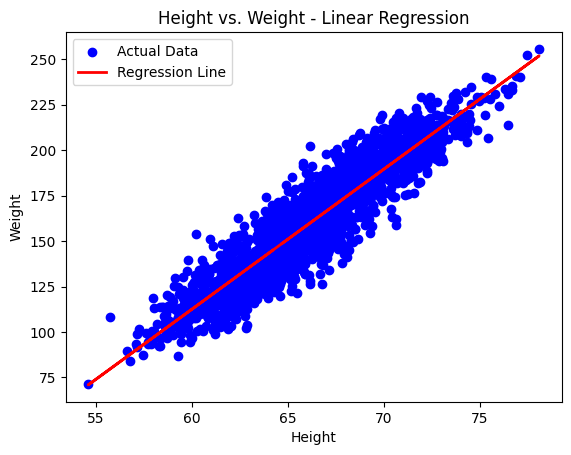

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("weight-height.csv")
X = df[['Height']]
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mdl = LinearRegression()
mdl.fit(X_train, y_train)

y_pred = mdl.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", mdl.coef_)
print("Intercept:", mdl.intercept_)
print("MSE:", mse)
print("R^2 Score:", r2)

plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs. Weight - Linear Regression")
plt.legend()
plt.show()


# **LAB 6**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.9225
Confusion Matrix:
 [[937  75]
 [ 80 908]]


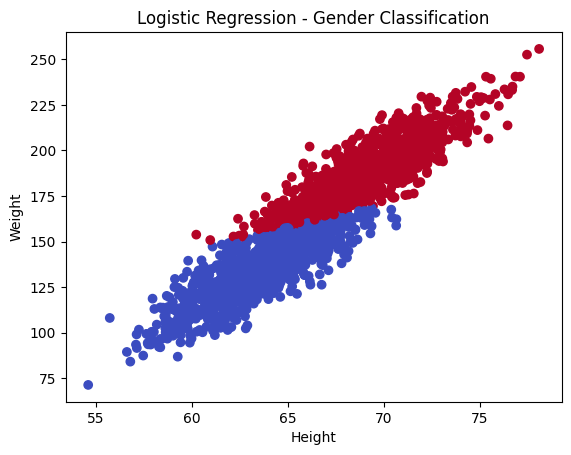

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv("weight-height.csv")
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Height', 'Weight']]
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mdl = LogisticRegression()
mdl.fit(X_train, y_train)

y_pred = mdl.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

plt.scatter(X_test['Height'], X_test['Weight'], c=y_pred, cmap='coolwarm', label='Predictions')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Logistic Regression - Gender Classification")
plt.show()
